In [1]:
# necessary imports for the notebook
import pandas as pd
from pandas_datareader import data
import numpy as np
import datetime
import matplotlib.pyplot as plt
# do all our graphics inline
%matplotlib inline
# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 78) 
pd.set_option('precision', 3)

# Obtaining historical stock and index data

## Fetching stock data from Yahoo! 

In [2]:
# request the previous three years of data for MSFT
# 2012 through 2014
start = datetime.date(2012, 1, 1)
end = datetime.date(2014, 12, 31)

# get data for MSFT
msft = data.DataReader('MSFT',"yahoo", start, end)
msft[:5]

             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2012-01-03  26.55  26.96  26.39  26.77     22.910  64731500
2012-01-04  26.82  27.47  26.78  27.40     23.449  80516100
2012-01-05  27.38  27.73  27.29  27.68     23.689  56081400
2012-01-06  27.53  28.19  27.53  28.11     24.057  99455500
2012-01-09  28.05  28.10  27.72  27.74     23.740  59706800

In [3]:
# retrieves the historical prices for a list of stocks
def get(tickers, start, end):
    def get_data(ticker):
        return data.DataReader(ticker, 'yahoo', 
                                     start, end)
        
    datas = map(get_data, tickers)
    
    return pd.concat(datas, keys=tickers, 
                     names=['Ticker', 'Date'])

In [7]:
# get data for the following stocks
#tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO'] -- errors out for 'DAL'
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'UAL', 'PEP', 'KO']
all_data = get(tickers, start, end)
all_data[:5]

                     Open    High     Low   Close  Adj Close    Volume
Ticker Date                                                           
AAPL   2012-01-03  58.486  58.929  58.429  58.747     52.852  75555200
       2012-01-04  58.571  59.240  58.469  59.063     53.136  65005500
       2012-01-05  59.279  59.793  58.953  59.719     53.726  67817400
       2012-01-06  59.967  60.393  59.889  60.343     54.288  79573200
       2012-01-09  60.786  61.107  60.193  60.247     54.202  98506100

## Fetching Index data from Yahoo!

In [8]:
# get daily S&P500 info
sp_500 = data.DataReader("^GSPC", "yahoo", start, end)
sp_500[:5]

               Open     High      Low    Close  Adj Close      Volume
Date                                                                 
2012-01-03  1258.86  1284.62  1258.86  1277.06    1277.06  3943710000
2012-01-04  1277.03  1278.73  1268.10  1277.30    1277.30  3592580000
2012-01-05  1277.30  1283.05  1265.26  1281.06    1281.06  4315950000
2012-01-06  1280.93  1281.84  1273.34  1277.81    1277.81  3656830000
2012-01-09  1277.83  1281.99  1274.55  1280.70    1280.70  3371600000

# Visualizing financial time series data

## Plotting closing prices

In [9]:
# reset the index to make everything columns
just_closing_prices = all_data[['Adj Close']].reset_index()
just_closing_prices[:5]

  Ticker       Date  Adj Close
0   AAPL 2012-01-03     52.852
1   AAPL 2012-01-04     53.136
2   AAPL 2012-01-05     53.726
3   AAPL 2012-01-06     54.288
4   AAPL 2012-01-09     54.202

In [10]:
# now pivot Date to the index, Ticker values to columns
daily_close_px = just_closing_prices.pivot('Date', 
                                           'Ticker', 
                                           'Adj Close')
daily_close_px[:5]

Ticker          AA    AAPL      GE  ...      MSFT     PEP    UAL
Date                                ...                         
2012-01-03  20.893  52.852  15.268  ...    22.910  56.261  18.90
2012-01-04  21.391  53.136  15.434  ...    23.449  56.549  18.52
2012-01-05  21.188  53.726  15.426  ...    23.689  56.108  18.39
2012-01-06  20.735  54.288  15.509  ...    24.057  55.405  18.21
2012-01-09  21.346  54.202  15.683  ...    23.740  55.693  17.93

[5 rows x 8 columns]

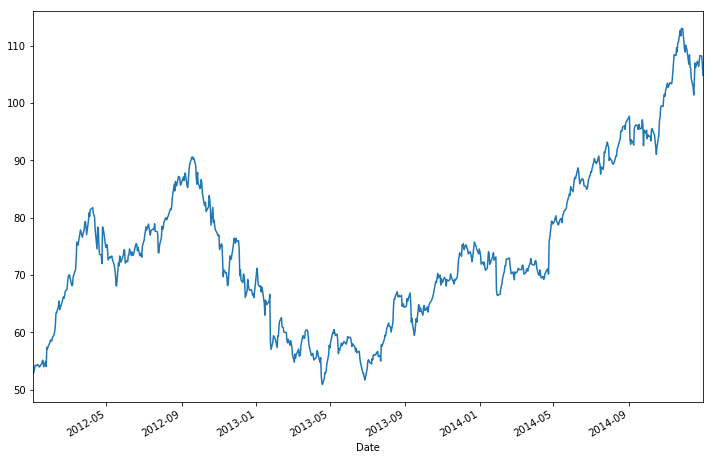

In [11]:
# plot AAPL
_ = daily_close_px['AAPL'].plot(figsize=(12,8));
plt.savefig('5104OS_05_01.png', bbox_inches='tight', dpi=300)

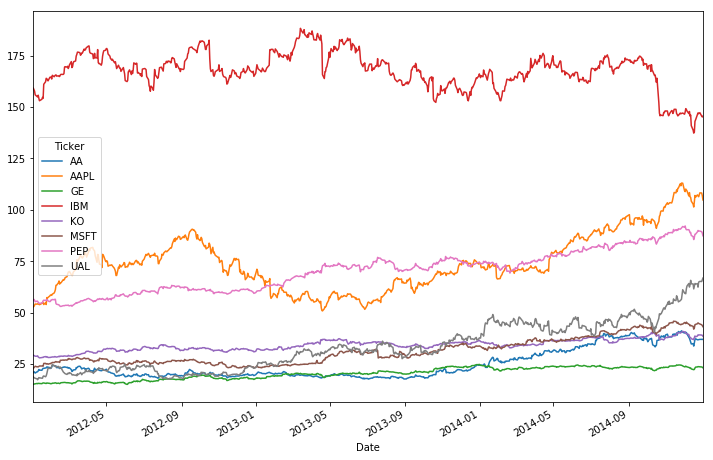

In [12]:
# plot all the stock closing prices against each other
_ = daily_close_px.plot(figsize=(12,8));
plt.savefig('5104OS_05_02.png', bbox_inches='tight', dpi=300)

## Plotting volumes series data

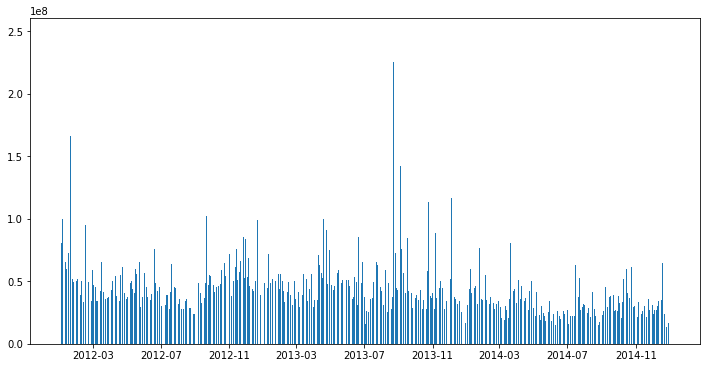

In [13]:
# get the daily volumes for MSFT
msftV = all_data.Volume.loc['MSFT']
# plot it
plt.bar(msftV.index, msftV)
# and set the plot size
plt.gcf().set_size_inches(12,6)
plt.savefig('5104OS_05_03.png', bbox_inches='tight', dpi=300)

## Combined Price and Volumes

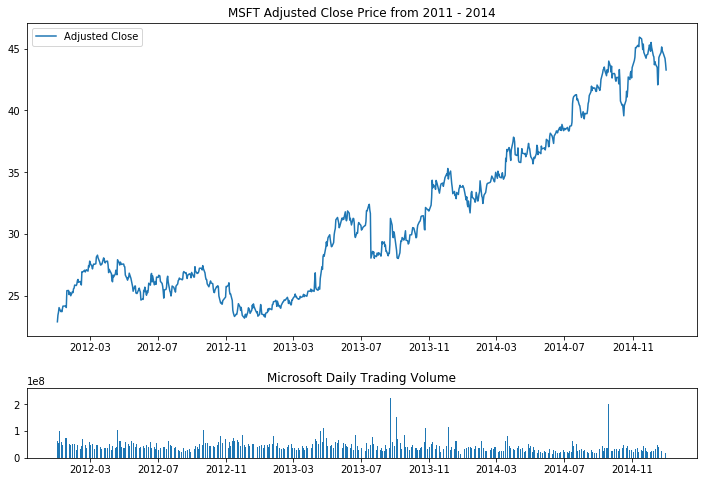

In [14]:
# draw a combined price vs volume graph
# subdivide the whole plot
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
# plot the price chart on the top
top.plot(daily_close_px.index, 
         daily_close_px['MSFT'], 
         label='Adjusted Close')
plt.title('MSFT Adjusted Close Price from 2011 - 2014')
plt.legend(loc=2)
# pick the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
# draw the bar at the bottom
bottom.bar(msftV.index, msftV)
plt.title('Microsoft Daily Trading Volume')
plt.gcf().set_size_inches(12,8) 
# set the size
plt.subplots_adjust(hspace=0.75)
plt.savefig('5104OS_05_04.png', bbox_inches='tight', dpi=300)

## Plotting candlesticks

In [15]:
# subset to MSFT in Dec 2014
subset = all_data.loc['MSFT'].loc['2014-12':'2014-12'] \
                 .reset_index() 
subset[:5]

        Date   Open   High    ...     Close  Adj Close    Volume
0 2014-12-01  47.88  48.78    ...     48.62     45.288  31191600
1 2014-12-02  48.84  49.05    ...     48.46     45.138  25773500
2 2014-12-03  48.44  48.50    ...     48.08     44.785  23534800
3 2014-12-04  48.39  49.06    ...     48.84     45.492  30320400
4 2014-12-05  48.82  48.97    ...     48.42     45.101  27313400

[5 rows x 7 columns]

In [16]:
# convert our dates matplotlib formatters representation
import matplotlib.dates as mdates
subset['date_num'] = subset['Date'] \
    .apply(lambda date: mdates.date2num(date.to_pydatetime()))
subset[:5]

        Date   Open   High    ...     Adj Close    Volume  date_num
0 2014-12-01  47.88  48.78    ...        45.288  31191600  735568.0
1 2014-12-02  48.84  49.05    ...        45.138  25773500  735569.0
2 2014-12-03  48.44  48.50    ...        44.785  23534800  735570.0
3 2014-12-04  48.39  49.06    ...        45.492  30320400  735571.0
4 2014-12-05  48.82  48.97    ...        45.101  27313400  735572.0

[5 rows x 8 columns]

In [17]:
# extract only values required, in order, as tuples
subset_as_tuples = [tuple(x) for x in subset[['date_num', 
                                              'Open', 
                                              'High', 
                                              'Low', 
                                              'Close']].values]
subset_as_tuples[:5]

[(735568.0, 47.880001, 48.779998999999997, 47.709998999999996, 48.619999),
 (735569.0, 48.840000000000003, 49.049999, 48.200001, 48.459998999999996),
 (735570.0, 48.439999, 48.5, 47.810001, 48.080002),
 (735571.0, 48.389998999999996, 49.060001, 48.200001, 48.840000000000003),
 (735572.0, 48.82, 48.970001000000003, 48.380001, 48.419998)]

In [18]:
# required imports for fomatting
from matplotlib.dates import DateFormatter
week_formatter = DateFormatter('%b %d')  # e.g., Jan 12

In [22]:
# We want to only display labels for Mondays
from matplotlib.dates import (WeekdayLocator, MONDAY)
mondays = WeekdayLocator(MONDAY) # major ticks on the mondays

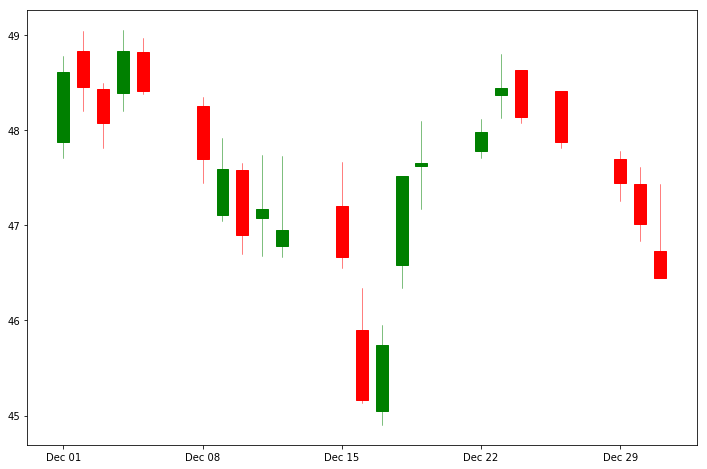

In [26]:
# now draw the plot
plt.figure()
fig, ax = plt.subplots(figsize=(12,8))
# set the locator and formatter for the x-axis
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(week_formatter)

# draw the candlesticks
from matplotlib.finance import candlestick_ohlc 
_ = candlestick_ohlc(ax, subset_as_tuples, width=0.6, 
                     colorup='g',colordown='r');
plt.savefig('5104OS_05_05.png', bbox_inches='tight', dpi=300)

# Fundamental Financial Calculations

## Calculating daily percentage change

In [27]:
# calc % change from day 0 to day 1
# formula = (p[t] - p[t-1])/p[t-1] = (p[t]/p[t-1]) - 1
AA_p_t0 = daily_close_px.iloc[0]['AA']  #Pt-1
AA_p_t1 = daily_close_px.iloc[1]['AA']  #Pt
r_t1 = AA_p_t1 / AA_p_t0 - 1 # returns
AA_p_t0, AA_p_t1, r_t1 

(20.893421, 21.39143, 0.023835684926848399)

In [28]:
# we can apply this to everything with the following using slices
dpc_1 = daily_close_px.iloc[1:] / \
        daily_close_px.iloc[:-1].values - 1
dpc_1.ix[:,'AA':'AAPL']

Ticker         AA       AAPL
Date                        
2012-01-04  0.024  5.374e-03
2012-01-05 -0.010  1.110e-02
2012-01-06 -0.021  1.045e-02
2012-01-09  0.029 -1.586e-03
2012-01-10  0.001  3.581e-03
...           ...        ...
2014-12-24  0.003 -4.709e-03
2014-12-26  0.003  1.768e-02
2014-12-29  0.000 -7.018e-04
2014-12-30  0.002 -1.220e-02
2014-12-31 -0.004 -1.902e-02

[753 rows x 2 columns]

In [29]:
# show the DataFrame that is the numerator
price_matrix_minus_day1 = daily_close_px.iloc[1:]
price_matrix_minus_day1[:5]

Ticker          AA    AAPL      GE  ...      MSFT     PEP    UAL
Date                                ...                         
2012-01-04  21.391  53.136  15.434  ...    23.449  56.549  18.52
2012-01-05  21.188  53.726  15.426  ...    23.689  56.108  18.39
2012-01-06  20.735  54.288  15.509  ...    24.057  55.405  18.21
2012-01-09  21.346  54.202  15.683  ...    23.740  55.693  17.93
2012-01-10  21.369  54.396  15.567  ...    23.826  55.634  17.48

[5 rows x 8 columns]

In [30]:
# the numerator is a 2-d array, but excludes the last day
daily_close_px.iloc[:-1].values

array([[  20.893421,   52.852215,   15.267709, ...,   22.909807,
          56.260559,   18.9     ],
       [  21.39143 ,   53.136253,   15.434025, ...,   23.448965,
          56.548645,   18.52    ],
       [  21.187698,   53.726177,   15.425712, ...,   23.688589,
          56.108044,   18.389999],
       ..., 
       [  37.101357,  108.293594,   23.771313, ...,   44.598236,
          89.731392,   65.279999],
       [  37.101357,  108.217598,   23.697542, ...,   44.197708,
          89.435539,   65.220001],
       [  37.171711,  106.897041,   23.577671, ...,   43.79718 ,
          88.723595,   66.050003]])

In [35]:
# or using the shift function
_val_curr = daily_close_px
print('_val_curr:\n{}\n'.format(_val_curr.ix[:,0:2][:5]))
_val_prev = daily_close_px.shift(1)
print('_val_prev:\n{}\n'.format(_val_prev.ix[:,0:2][:5]))
#dpc_2 = daily_close_px / daily_close_px.shift(1) - 1
dpc_2 = _val_curr / _val_prev - 1
dpc_2.ix[:,0:2][:5]

_val_curr:
Ticker          AA    AAPL
Date                      
2012-01-03  20.893  52.852
2012-01-04  21.391  53.136
2012-01-05  21.188  53.726
2012-01-06  20.735  54.288
2012-01-09  21.346  54.202

_val_prev:
Ticker          AA    AAPL
Date                      
2012-01-03     NaN     NaN
2012-01-04  20.893  52.852
2012-01-05  21.391  53.136
2012-01-06  21.188  53.726
2012-01-09  20.735  54.288



Ticker         AA   AAPL
Date                    
2012-01-03    NaN    NaN
2012-01-04  0.024  0.005
2012-01-05 -0.010  0.011
2012-01-06 -0.021  0.010
2012-01-09  0.029 -0.002

In [36]:
# to make this easy, pandas has .pct_change() baked in
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.ix[:,0:2][:5]

Ticker         AA   AAPL
Date                    
2012-01-03    NaN    NaN
2012-01-04  0.024  0.005
2012-01-05 -0.010  0.011
2012-01-06 -0.021  0.010
2012-01-09  0.029 -0.002

In [37]:
# set NaN's to 0 
daily_pct_change.fillna(0, inplace=True)
daily_pct_change.ix[:5,:5]

Ticker         AA   AAPL         GE    IBM     KO
Date                                             
2012-01-03  0.000  0.000  0.000e+00  0.000  0.000
2012-01-04  0.024  0.005  1.089e-02 -0.004 -0.006
2012-01-05 -0.010  0.011 -5.386e-04 -0.005 -0.005
2012-01-06 -0.021  0.010  5.390e-03 -0.011 -0.006
2012-01-09  0.029 -0.002  1.126e-02 -0.005  0.000

## Calculating simple daily cumulative returns

In [38]:
# calc the cumulative daily returns 
# formula = i[i] = (1 + r[t]) * i(t-1), i[0]=1
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.ix[:,:2][:5]

Ticker         AA   AAPL
Date                    
2012-01-03  1.000  1.000
2012-01-04  1.024  1.005
2012-01-05  1.014  1.017
2012-01-06  0.992  1.027
2012-01-09  1.022  1.026

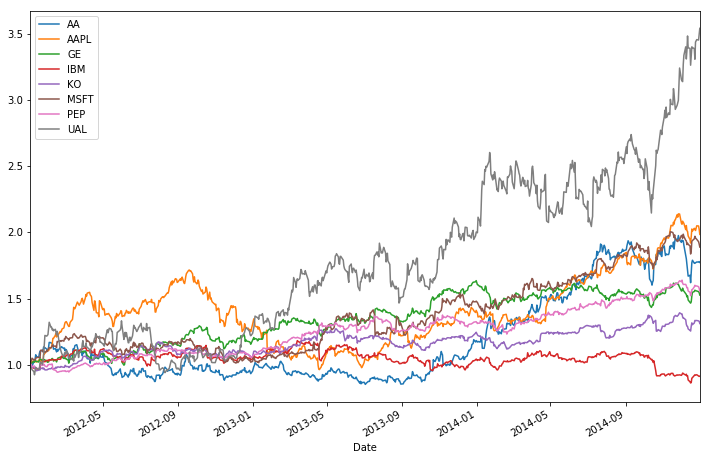

In [40]:
# plot all the cumulative returns
cum_daily_return.plot(figsize=(12,8))
_ = plt.legend(loc=2);
plt.savefig('5104OS_05_08.png', bbox_inches='tight', dpi=300)

## Analyzing distribution of returns

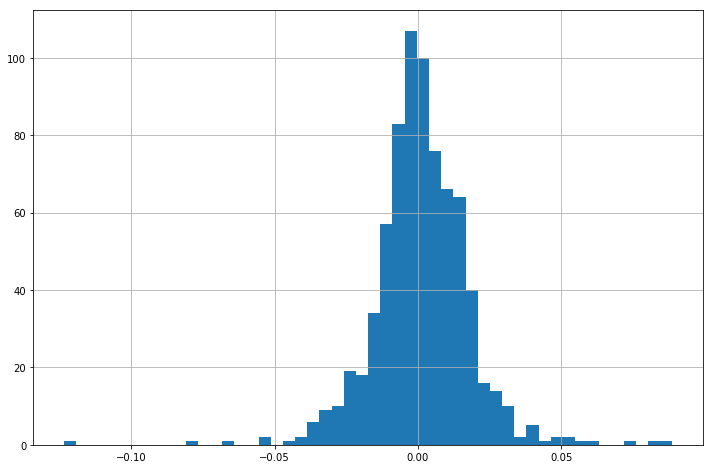

In [41]:
# Histograms give you an overall feel for the distribution of returns. 
# In general, return distributions are approximately normal in shape, demonstrating a familiar bell curve shape.
# We use 50 bins, which gives a good feel for the distribution of daily changes across three years of data
# plot daily % change values histogram for AAPL using 50 bins
aapl = daily_pct_change['AAPL']
_ = aapl.hist(bins=50, figsize=(12,8));
plt.savefig('5104OS_05_09.png', bbox_inches='tight', dpi=300)

# Looking at the chart, most of the daily changes center around 0.0, 
# and there is a small amount of skew to the left, 
# but the data appears fairly symmetrical and normally distributed.

# Skewed Right: 
# If most of the data are on the left side of the histogram but a few larger values are on the right.

# Skewed Left:
# If most of the data are on the right, with a few smaller values showing up on the left side of the histogram

# Symmetric:
# If the data are symmetric, they have about the same shape on either side of the middle. 
# In other words, if you fold the histogram in half, it looks about the same on both sides.


In [42]:
# get descriptive statistics
aapl.describe()

# Using this information, some of our conclusions from the histogram can be rationalized. 
# The mean of the distributions is very close to 0.0, being 0.001. The standard deviation is 0.017.

count    7.540e+02
mean     1.051e-03
std      1.685e-02
min     -1.236e-01
25%     -7.365e-03
50%      4.987e-04
75%      1.095e-02
max      8.874e-02
Name: AAPL, dtype: float64

In [29]:
aapl.describe(percentiles=[0.025, 0.5, 0.975])

# This range of percentiles is commonly used to formulate a 95 percent confidence interval. 
# If our return distribution is perfectly normally distributed (with an equal distribution of gains and losses), 
# then we would expect our 2.5 percent value to be -1.95996 times the standard deviation less than the mean, 
# and the 97.5 percent value to be 1.95996 times the standard deviation above the mean.

# Manually calculating these, we get the 2.5 percent value as -0.032 and the 97.5 percent value as 0.034. 
# These are roughly equivalent, again giving us a good feeling that this stock has an equal distribution of gains and losses.

# And, statistically speaking, this range of values gives us the 95 percent confidence interval, which tells us that over 
# the last three years, the daily return on 95 percent of the days will fall within -0.032 percent and 0.032 percent.

count    7.54e+02
mean     1.05e-03
std      1.68e-02
min     -1.24e-01
2.5%    -3.19e-02
50%      4.99e-04
97.5%    3.17e-02
max      8.87e-02
Name: AAPL, dtype: float64

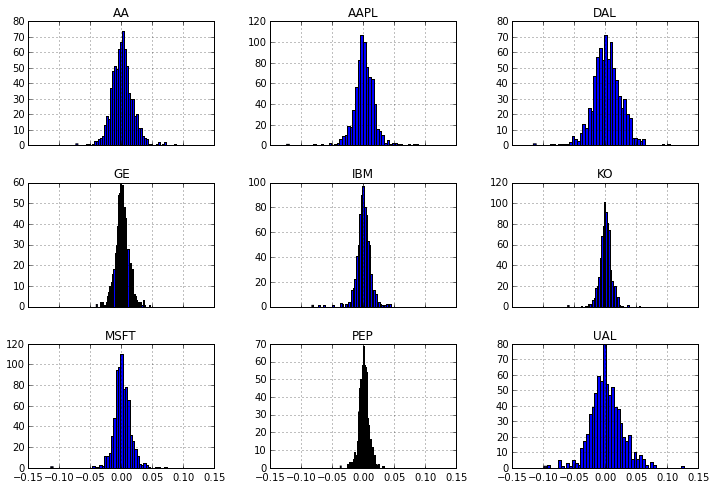

In [30]:
# plot all the cumulative return distributions
_ = daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8));
plt.savefig('5104OS_05_10.png', bbox_inches='tight', dpi=300)

### QQ-Plots

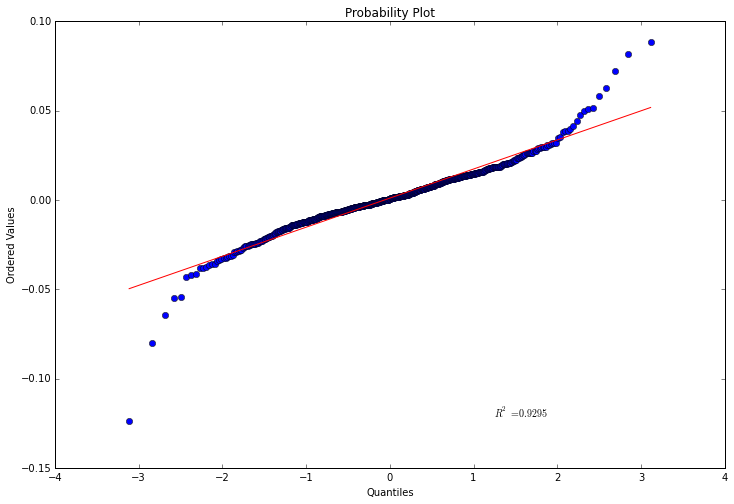

In [31]:
# create a qq-plot of AAPl returns vs normal
import scipy.stats as stats
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(aapl, dist='norm', plot=ax)
plt.show();
plt.savefig('5104OS_05_11.png', dpi=300)

### Box and whisker plots

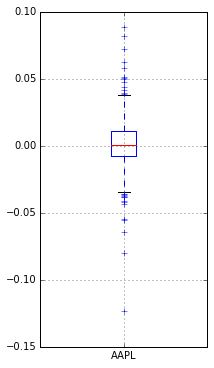

In [32]:
# create a box and whisker for the AAPL returns
_ = daily_pct_change[['AAPL']].plot(kind='box', figsize=(3,6));
plt.savefig('5104OS_05_12.png', dpi=300)

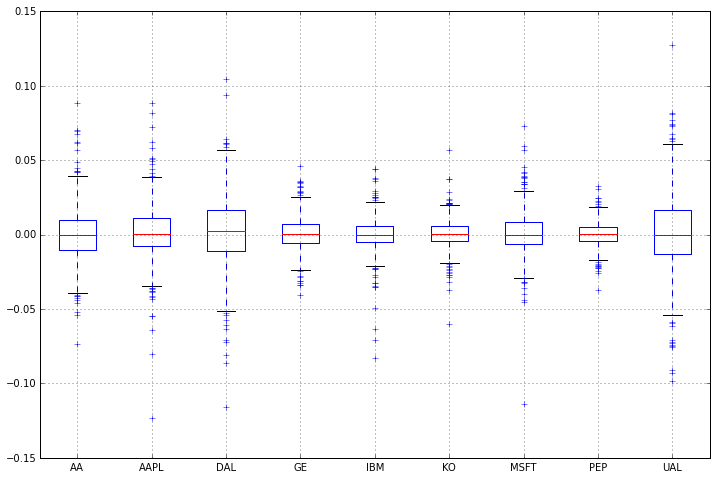

In [33]:
# examine all the returns 
daily_pct_change.plot(kind='box', figsize=(12,8));
plt.savefig('5104OS_05_13.png', dpi=300)

## Comparison of daily percentage change between stocks

In [34]:
def render_scatter_plot(data, x_stock_name, 
                        y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    # horiz and v lines at 0
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    # this line would be perfect correlation
    ax.plot((-10, 10), (-10, 10))
    # label axes
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

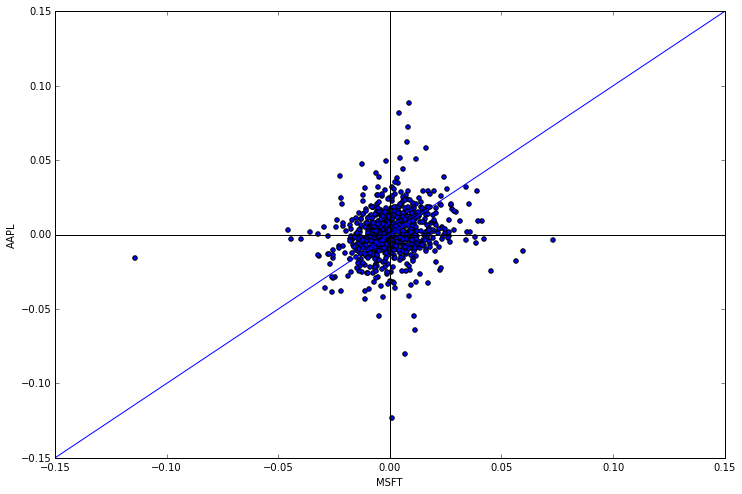

In [35]:
# MSFT vs AAPL
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'MSFT', 'AAPL', xlim=limits)
plt.savefig('5104OS_05_14.png', bbox_inches='tight', dpi=300)

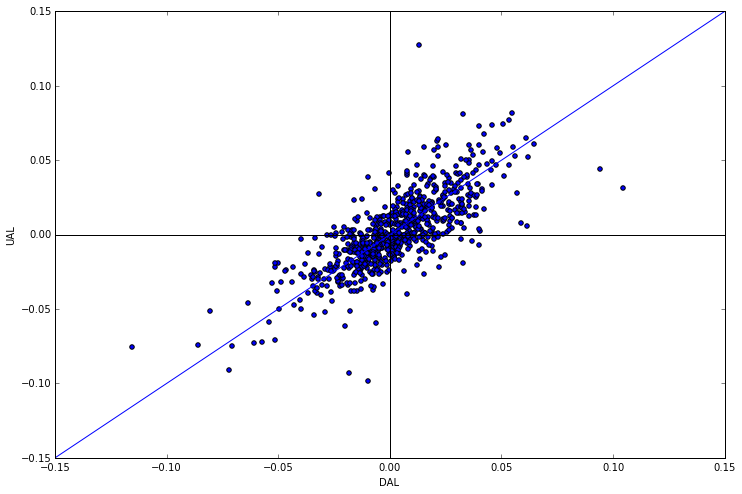

In [36]:
# DAL vs UAL
render_scatter_plot(daily_pct_change, 'DAL', 'UAL', xlim=limits)
plt.savefig('5104OS_05_15.png', bbox_inches='tight', dpi=300)

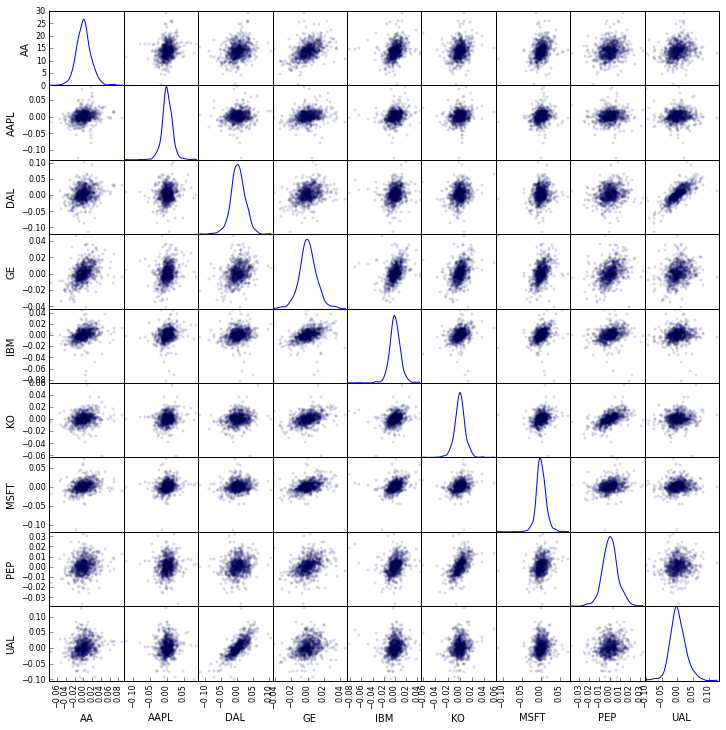

In [37]:
# all stocks against each other, with a KDE in the diagonal
_ = pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,
                      figsize=(12,12));
plt.savefig('5104OS_05_16.png', bbox_inches='tight', dpi=300)

## Moving Windows

In [38]:
msftAC = msft['2012']['Adj Close']
msftAC[:5]

Date
2012-01-03    24.42
2012-01-04    25.00
2012-01-05    25.25
2012-01-06    25.64
2012-01-09    25.31
Name: Adj Close, dtype: float64

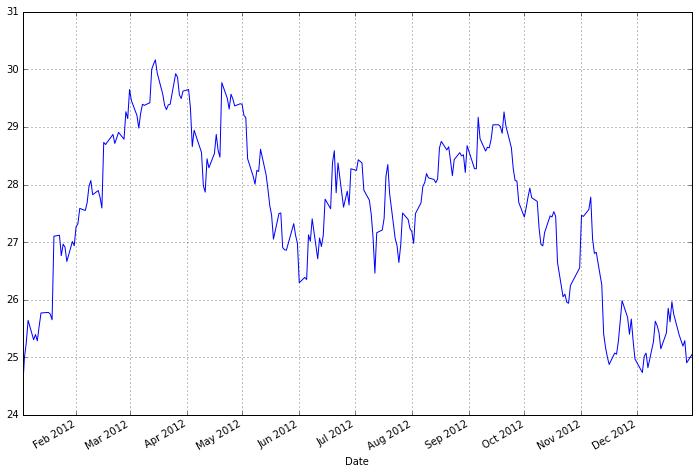

In [39]:
sample = msftAC['2012'] 
sample.plot(figsize=(12,8));
plt.savefig('5104OS_05_17.png', bbox_inches='tight', dpi=300)

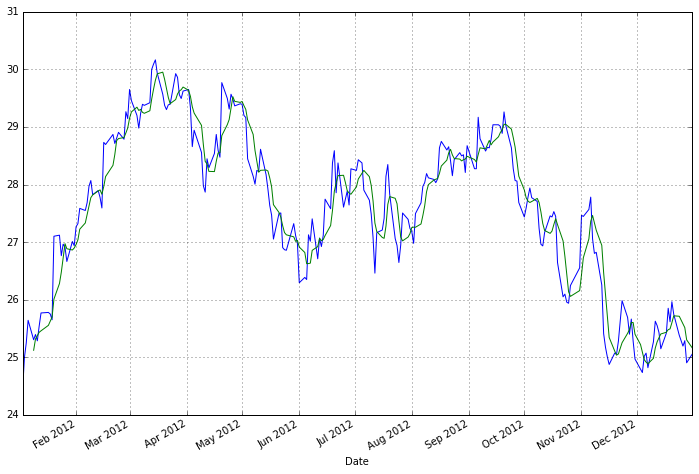

In [40]:
sample.plot(figsize=(12,8))
pd.rolling_mean(sample, 5).plot(figsize=(12,8));
plt.savefig('5104OS_05_18.png', bbox_inches='tight', dpi=300)

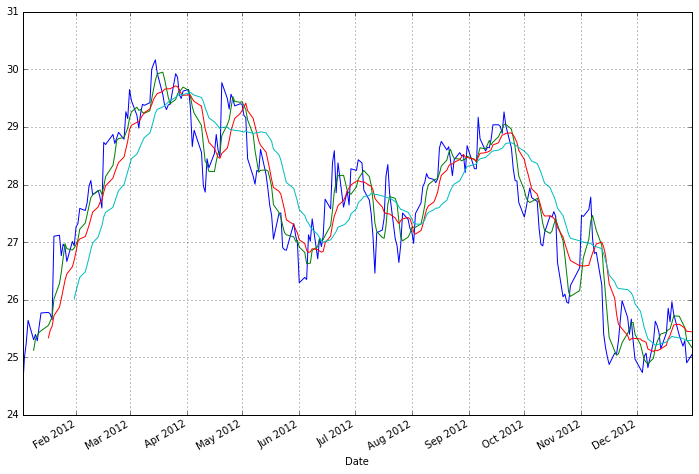

In [41]:
sample.plot(figsize=(12,8))
pd.rolling_mean(sample, 5).plot(figsize=(12,8))
pd.rolling_mean(sample, 10).plot(figsize=(12,8))
pd.rolling_mean(sample, 20).plot(figsize=(12,8));
plt.savefig('5104OS_05_19.png', bbox_inches='tight', dpi=300)

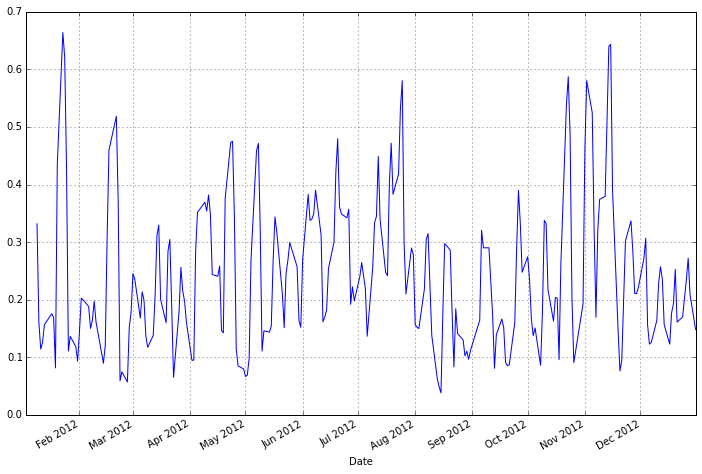

In [42]:
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
pd.rolling_apply(sample, 5, mean_abs_dev).plot(figsize=(12,8));
plt.savefig('5104OS_05_20.png', bbox_inches='tight', dpi=300)

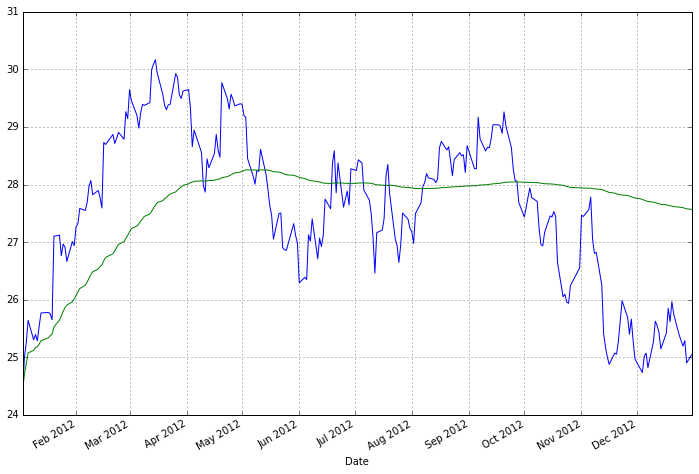

In [43]:
expanding_mean = lambda x: pd.rolling_mean(x, len(x), 
                                           min_periods=1)
sample.plot()
pd.expanding_mean(sample).plot(figsize=(12,8));
plt.savefig('5104OS_05_21.png', bbox_inches='tight', dpi=300)

## Volatility calculation

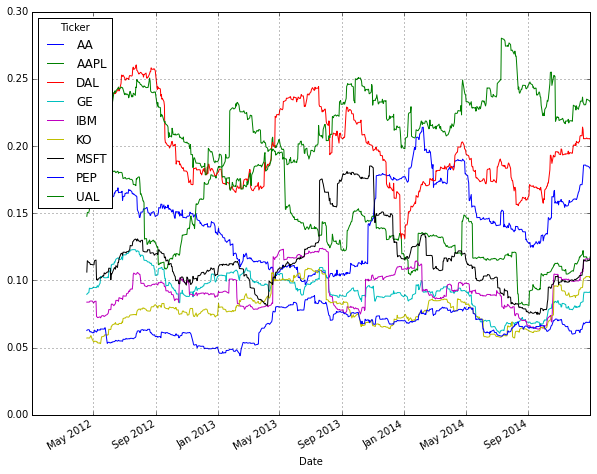

In [44]:
# use a minimum of 75 days
min_periods = 75
# calculate the rolling standard deviation
vol = pd.rolling_std(daily_pct_change, min_periods) * \
                     np.sqrt(min_periods)
# plot it
_ = vol.plot(figsize=(10, 8));
plt.savefig('5104OS_05_22.png', bbox_inches='tight', dpi=300)

## Rolling correlation of returns

In [45]:
# one year (252 days) rolling correlation of AAPL and MSFT
rolling_corr = pd.rolling_corr(daily_pct_change['AAPL'], 
                               daily_pct_change['MSFT'], 
                               window=252).dropna()
rolling_corr[251:] #first 251 are NaN

Date
2014-01-02    0.08
2014-01-03    0.08
2014-01-06    0.07
2014-01-07    0.07
2014-01-08    0.07
              ... 
2014-12-24    0.23
2014-12-26    0.23
2014-12-29    0.23
2014-12-30    0.23
2014-12-31    0.24
dtype: float64

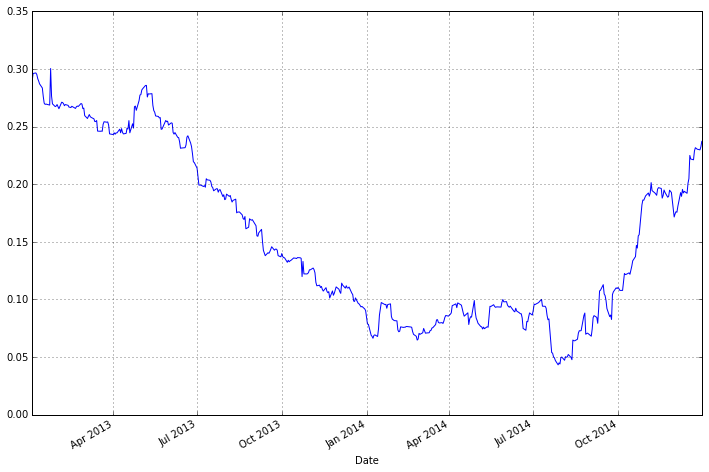

In [46]:
# plot the rolling correlation
_ = rolling_corr.plot(figsize=(12,8));
plt.savefig('5104OS_05_23.png', bbox_inches='tight', dpi=300)

## Least squares regression of returns (beta)

In [47]:
# least squares on the returns of AAPL and MSFT
model = pd.ols(y=daily_pct_change['AAPL'], 
               x={'MSFT': daily_pct_change['MSFT']}, 
               window=250)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <MSFT> + <intercept>

Number of Observations:         250
Number of Degrees of Freedom:   2

R-squared:         0.0539
Adj R-squared:     0.0501

Rmse:              0.0132

F-stat (1, 248):    14.1193, p-value:     0.0002

Degrees of Freedom: model 1, resid 248

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
          MSFT     0.2625     0.0699       3.76     0.0002     0.1256     0.3994
     intercept     0.0013     0.0008       1.56     0.1195    -0.0003     0.0030
---------------------------------End of Summary---------------------------------

In [48]:
# what is the beta?
model.beta[0:5]

            MSFT  intercept
Date                       
2012-12-31  0.40          0
2013-01-02  0.41          0
2013-01-03  0.41          0
2013-01-04  0.42          0
2013-01-07  0.42          0

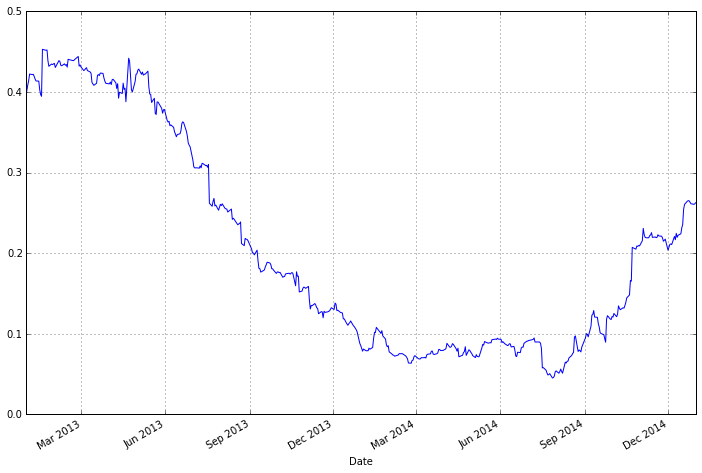

In [49]:
_ = model.beta['MSFT'].plot(figsize=(12, 8)); # plot the beta
plt.savefig('5104OS_05_24.png', bbox_inches='tight', dpi=300)

# Comparing stocks to the S&P 500

In [50]:
# we need to calculate the pct change on the close for S&P 500
sp_500_dpc = sp_500['Adj Close'].pct_change().fillna(0)
sp_500_dpc[:5]

Date
2012-01-03    0.00e+00
2012-01-04    1.88e-04
2012-01-05    2.94e-03
2012-01-06   -2.54e-03
2012-01-09    2.26e-03
Name: Adj Close, dtype: float64

In [51]:
# now concat the S&P data with the other daily pct values
dpc_all = pd.concat([sp_500_dpc, daily_pct_change], axis=1)
dpc_all.rename(columns={'Adj Close': 'SP500'}, inplace=True)
dpc_all[:5]

               SP500    AA  AAPL  ...   MSFT   PEP   UAL
Date                              ...                   
2012-01-03  0.00e+00  0.00  0.00  ...   0.00  0.00  0.00
2012-01-04  1.88e-04  0.02  0.01  ...   0.02  0.01 -0.02
2012-01-05  2.94e-03 -0.01  0.01  ...   0.01 -0.01 -0.01
2012-01-06 -2.54e-03 -0.02  0.01  ...   0.02 -0.01 -0.01
2012-01-09  2.26e-03  0.03 -0.00  ...  -0.01  0.01 -0.02

[5 rows x 10 columns]

In [52]:
# from all the daily, calculate the cumulative
cdr_all = (1 + dpc_all).cumprod()
cdr_all[:5]

            SP500    AA  AAPL  ...   MSFT   PEP   UAL
Date                           ...                   
2012-01-03      1  1.00  1.00  ...   1.00  1.00  1.00
2012-01-04      1  1.02  1.01  ...   1.02  1.01  0.98
2012-01-05      1  1.01  1.02  ...   1.03  1.00  0.97
2012-01-06      1  0.99  1.03  ...   1.05  0.98  0.96
2012-01-09      1  1.02  1.03  ...   1.04  0.99  0.95

[5 rows x 10 columns]

In [53]:
# calculate the correlations
dpc_corrs = dpc_all.corr()
dpc_corrs

       SP500    AA  AAPL  ...   MSFT   PEP   UAL
SP500   1.00  0.60  0.41  ...   0.54  0.52  0.32
AA      0.60  1.00  0.24  ...   0.31  0.23  0.22
AAPL    0.41  0.24  1.00  ...   0.19  0.09  0.06
DAL     0.42  0.25  0.14  ...   0.15  0.17  0.76
GE      0.73  0.46  0.24  ...   0.34  0.38  0.24
IBM     0.53  0.31  0.21  ...   0.36  0.26  0.12
KO      0.53  0.23  0.16  ...   0.27  0.56  0.14
MSFT    0.54  0.31  0.19  ...   1.00  0.28  0.13
PEP     0.52  0.23  0.09  ...   0.28  1.00  0.13
UAL     0.32  0.22  0.06  ...   0.13  0.13  1.00

[10 rows x 10 columns]

In [54]:
# how well did each stock relate to the S&P 500?
dpc_corrs.ix['SP500']

SP500    1.00
AA       0.60
AAPL     0.41
DAL      0.42
GE       0.73
IBM      0.53
KO       0.53
MSFT     0.54
PEP      0.52
UAL      0.32
Name: SP500, dtype: float64

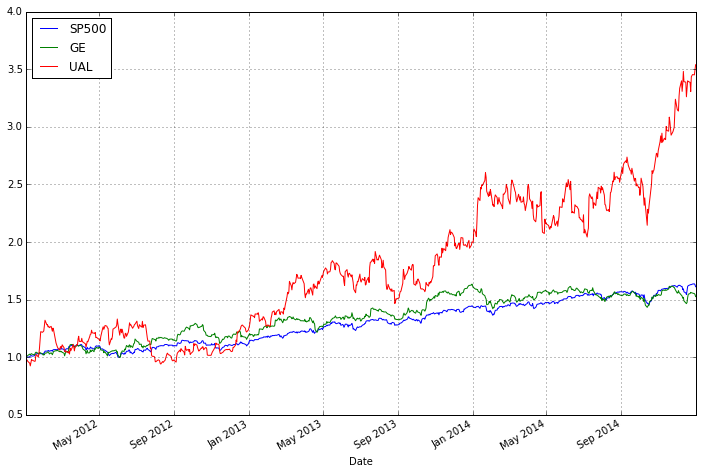

In [55]:
# plot GE/UAL against S&P500
_ = cdr_all[['SP500', 'GE', 'UAL']].plot(figsize=(12,8));
plt.savefig('5104OS_05_25.png', bbox_inches='tight', dpi=300)

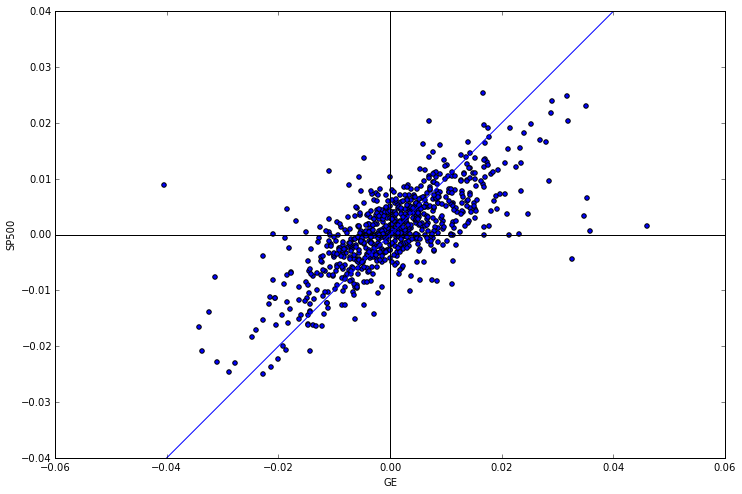

In [56]:
# GE vs S&P 500
render_scatter_plot(dpc_all, 'GE', 'SP500')
plt.savefig('5104OS_05_26.png', bbox_inches='tight', dpi=300)

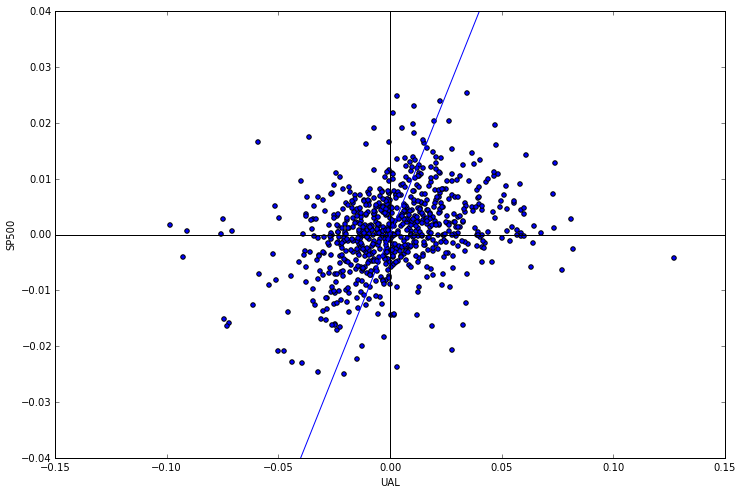

In [57]:
# and UAL vs S&P 500
render_scatter_plot(dpc_all, 'UAL', 'SP500')
plt.savefig('5104OS_05_27.png', bbox_inches='tight', dpi=300)